In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataset = dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [5]:
#Data Imputation
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

# dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
# dataset['Age'] = dataset['Age'].apply(lambda x: dataset['Age'].mean() if pd.isnull(x) else x)

# Preprocessing

In [6]:
dataset['Sex'] = dataset.Sex.apply(lambda x:1 if x == 'male' else 0)

In [7]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# Modelling
- Using sklearn library
- from scratch

In [8]:
#sklearn library

X = dataset.drop(columns=['Survived'])
y = dataset['Survived']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=26)

classifier = LogisticRegression(random_state=26).fit(X_train,y_train)


# Evaluation

- Accuracy
- Precision
- Recall
- F1
- ROC - AUC

In [9]:
prediction = classifier.predict(X_test)

In [10]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print('Accuracy:', accuracy)

Accuracy: 0.7985074626865671


In [11]:
#precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, prediction)
print('Precision:', precision)

Precision: 0.7692307692307693


In [12]:
#recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, prediction)
print('Recall:', recall)

Recall: 0.6796116504854369


In [13]:
#f1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, prediction)
print('F1 Score:', f1)

F1 Score: 0.7216494845360825


In [14]:
#ROC-AUC
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, prediction)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.776169461606355


In [15]:
#classification report
from sklearn.metrics import classification_report

target_names = ['Not Survived', 'Survived']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.81      0.87      0.84       165
    Survived       0.77      0.68      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [16]:
prediction_proba = classifier.predict_proba(X_test)
print(prediction_proba)

[[0.60550379 0.39449621]
 [0.1944335  0.8055665 ]
 [0.73439412 0.26560588]
 [0.97593463 0.02406537]
 [0.91789913 0.08210087]
 [0.15667993 0.84332007]
 [0.91484651 0.08515349]
 [0.93162713 0.06837287]
 [0.72907522 0.27092478]
 [0.8982093  0.1017907 ]
 [0.04877398 0.95122602]
 [0.29080914 0.70919086]
 [0.50203451 0.49796549]
 [0.94007516 0.05992484]
 [0.03100154 0.96899846]
 [0.96356005 0.03643995]
 [0.46629165 0.53370835]
 [0.3788764  0.6211236 ]
 [0.89944381 0.10055619]
 [0.29048735 0.70951265]
 [0.12092032 0.87907968]
 [0.77574297 0.22425703]
 [0.89425602 0.10574398]
 [0.05159501 0.94840499]
 [0.73141186 0.26858814]
 [0.51982601 0.48017399]
 [0.75673119 0.24326881]
 [0.04746403 0.95253597]
 [0.22015078 0.77984922]
 [0.17673466 0.82326534]
 [0.46465489 0.53534511]
 [0.56904758 0.43095242]
 [0.89808759 0.10191241]
 [0.93325101 0.06674899]
 [0.05224693 0.94775307]
 [0.89815017 0.10184983]
 [0.56190285 0.43809715]
 [0.93851328 0.06148672]
 [0.5726169  0.4273831 ]
 [0.88858697 0.11141303]


In [17]:
predict_log_proba = classifier.predict_log_proba(X_test)
print(predict_log_proba)

[[-0.50169446 -0.93014573]
 [-1.63766506 -0.21620953]
 [-0.30870945 -1.32574173]
 [-0.02435967 -3.72698131]
 [-0.08566778 -2.49980665]
 [-1.85355019 -0.17040872]
 [-0.08899898 -2.46329984]
 [-0.07082262 -2.68277915]
 [-0.31597838 -1.30591404]
 [-0.10735216 -2.28483658]
 [-3.02055825 -0.05000358]
 [-1.23508809 -0.3436306 ]
 [-0.68908642 -0.6972245 ]
 [-0.06179544 -2.81466425]
 [-3.47371854 -0.03149225]
 [-0.03712047 -3.31208965]
 [-0.76294398 -0.62790575]
 [-0.97054525 -0.47622518]
 [-0.1059787  -2.2970386 ]
 [-1.23619525 -0.34317695]
 [-2.11262348 -0.12887973]
 [-0.25393404 -1.49496243]
 [-0.11176316 -2.24673443]
 [-2.96433028 -0.05297367]
 [-0.31277856 -1.31457615]
 [-0.65426111 -0.73360677]
 [-0.27874719 -1.41358824]
 [-3.04778317 -0.04862741]
 [-1.51344259 -0.24865469]
 [-1.73310575 -0.19447673]
 [-0.76646032 -0.62484368]
 [-0.56379123 -0.84175758]
 [-0.10748768 -2.28364153]
 [-0.06908108 -2.70681608]
 [-2.95177411 -0.05366129]
 [-0.107418   -2.28425577]
 [-0.5764263  -0.8253146 ]
 

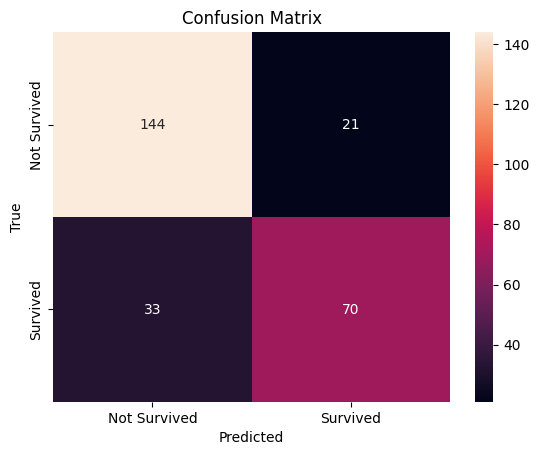

In [18]:
#confusion matrix plot

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set(xlabel='Predicted', ylabel='True')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
ax.set_title('Confusion Matrix')
plt.show()



In [19]:
#training data classification report

target_names = ['Not Survived', 'Survived']

print(classification_report(y_test, classifier.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.81      0.87      0.84       165
    Survived       0.77      0.68      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [20]:
# balanced data classification report from db_upsampled
# balancing data in db to use in a logisticRegression model
from sklearn.utils import resample
db = pd.read_csv('titanic.csv')
db = db.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
db['Age'] = db['Age'].fillna(db['Age'].mean())
db['Sex'] = db.Sex.apply(lambda x:1 if x == 'male' else 0)
db_majority = db[db.Survived == 0]
db_minority = db[db.Survived == 1]
db_minority_upsampled = resample(db_minority, replace=True, n_samples=549, random_state=123)
db_upsampled = pd.concat([db_majority, db_minority_upsampled])
db_upsampled.Survived.value_counts()

X = db_upsampled.drop(columns=['Survived'])
y = db_upsampled['Survived']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=26)

classifierdb = LogisticRegression(random_state=26,max_iter = 1000).fit(X_train,y_train)

In [21]:
target_names = ['Not Survived', 'Survived']

print(classification_report(y_test, classifierdb.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.75      0.81      0.78       165
    Survived       0.79      0.73      0.76       165

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330



In [22]:
dbE = pd.read_csv('titanic.csv')
dbE = dbE.drop(['Name', 'Ticket', 'Cabin'], axis=1)
dbE['Age'] = dbE['Age'].fillna(dbE['Age'].mean())
dbE['Embarked'] = dbE['Embarked'].fillna('S')
dbE['Sex'] = dbE.Sex.apply(lambda x:1 if x == 'male' else 0)
dbE['Embarked'] = dbE.Embarked.apply(lambda x:2 if x == 'S' else (1 if x == 'C' else 0))
dbE.Embarked.value_counts()


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = dbE.drop(columns=['Survived'])
y = dbE['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=26)

classifierdb = LogisticRegression(random_state=26,max_iter = 1000).fit(X_train,y_train)
dbE.Embarked.value_counts()

Embarked
2    646
1    168
0     77
Name: count, dtype: int64

In [23]:
target_names = ['Not Survived', 'Survived']

print(classification_report(y_test, classifierdb.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.81      0.85      0.83       165
    Survived       0.74      0.68      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



<Axes: >

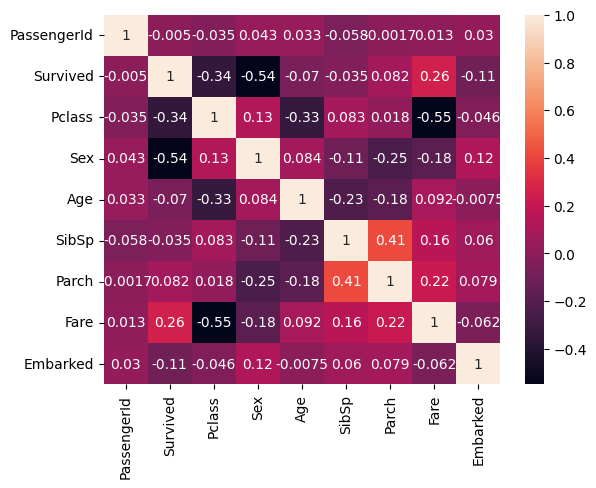

In [24]:
#correlation of embarkation and survival
sns.heatmap(dbE.corr(), annot=True)